In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import boxcox
import statsmodels.api as sm
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline


In [2]:
sneakers_df = pd.read_csv('data_for_ml.csv', header=0, index_col=0)
best_week_df = pd.read_csv('sku_weekly_transaction_data.csv', header=0, index_col=0) 

In [3]:
sneakers_df = pd.merge(sneakers_df, best_week_df, on='sku')

In [4]:
sneakers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2755 entries, 0 to 2754
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   2755 non-null   object 
 1   model                   2755 non-null   object 
 2   name                    2755 non-null   object 
 3   brand                   2755 non-null   object 
 4   releaseDate             2755 non-null   object 
 5   sku                     2755 non-null   object 
 6   retailPrice($)          2755 non-null   float64
 7   averageTransaction      2755 non-null   float64
 8   totalTransactions       2755 non-null   int64  
 9   medianTransaction       2755 non-null   float64
 10  averagePremiumPrice(%)  2755 non-null   float64
 11  medianProfit            2755 non-null   float64
 12  medianPremiumPrice(%)   2755 non-null   float64
 13  releaseRank             2755 non-null   float64
 14  Collab                  2755 non-null   

In [5]:
def make_hist(df,column, title= None, xlabel =''):
    fig = plt.figure(figsize=(10,4))
    sns.distplot(df[column] , bins = 25)
    plt.ylabel('Count')
    plt.xlabel(xlabel)
    plt.title(title)

In [6]:
sneakers_df['average_premium_price'] = sneakers_df['averagePremiumPrice(%)']/100

In [7]:
# lowering everything
sneakers_df['model'] = sneakers_df['model'].str.lower()
sneakers_df['brand'] = sneakers_df['brand'].str.lower()

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


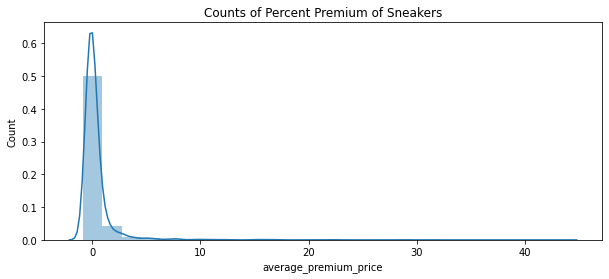

In [8]:
make_hist(sneakers_df, column = 'average_premium_price',xlabel = 'average_premium_price', title = 'Counts of Percent Premium of Sneakers',)

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


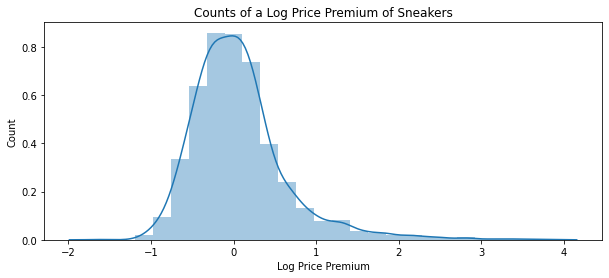

In [9]:
sneakers_df['log_price_premium'] = np.log(sneakers_df['average_premium_price']+1)
make_hist(sneakers_df,column = 'log_price_premium', xlabel = 'Log Price Premium', title ='Counts of a Log Price Premium of Sneakers')

Taking the log of the the column to reduce skewness to the right

In [10]:
#sneakers_df['boxcox_price_premium'] = boxcox(sneakers_df['average_premium_price'])[0]

In [11]:
# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer(method='yeo-johnson')
# pt.fit_transform(sneakers_df['average_premium_price'])
# # needs to be a 2d array - not sure how to do it with just average_premium_price column (1D array)

In [12]:
print(f"The skewness for average price premium: {sneakers_df['average_premium_price'].skew(axis=0)}")
print(f"The skewness for LOG average price premium: {sneakers_df['log_price_premium'].skew(axis=0)}")

The skewness for average price premium: 10.607312968158606
The skewness for LOG average price premium: 1.6471544850785538


/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


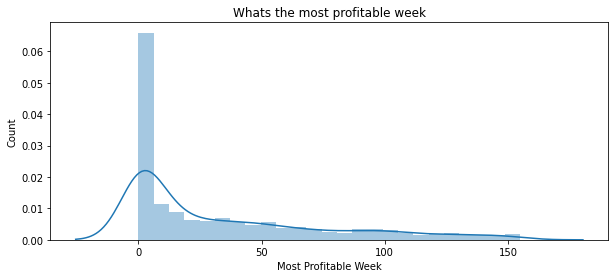

In [13]:
make_hist(sneakers_df,column = 'most_profitable_week', xlabel = 'Most Profitable Week', title ='Whats the most profitable week')

In [14]:
sneakers_df.columns

Index(['color', 'model', 'name', 'brand', 'releaseDate', 'sku',
       'retailPrice($)', 'averageTransaction', 'totalTransactions',
       'medianTransaction', 'averagePremiumPrice(%)', 'medianProfit',
       'medianPremiumPrice(%)', 'releaseRank', 'Collab', 'hasBlack',
       'hasWhite', 'hasRed', 'hasYellow', 'hasBlue', 'hasGreen', 'hasGrey',
       'most_profitable_week', 'average_premium_price', 'log_price_premium'],
      dtype='object')

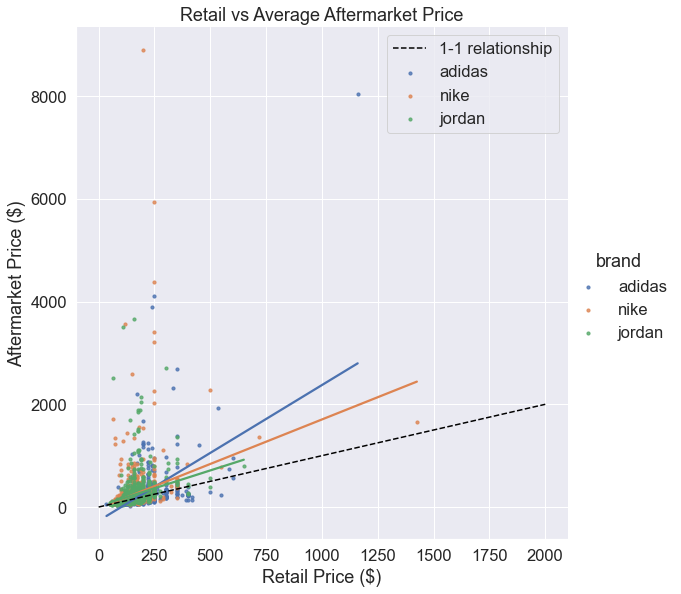

In [15]:
# See a 1-to-1 linear line for retail Price vs Aftermarket price
sns.set(font_scale=1.5)
sns.lmplot(x='retailPrice($)', y ='averageTransaction', data=sneakers_df, hue='brand', 
           fit_reg=True, height=8, scatter_kws={"s": 10}, ci=None)

plt.plot(np.linspace(0,2000,2000), np.linspace(0,2000,2000), linestyle='--', 
         color='black', label='1-1 relationship')

#plt.xlim([0,1000])
#plt.ylim([0,1250])
plt.title('Retail vs Average Aftermarket Price')
plt.xlabel('Retail Price ($)')
plt.ylabel('Aftermarket Price ($)')
plt.legend(loc='best')
plt.show()

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='brand', ylabel='count'>

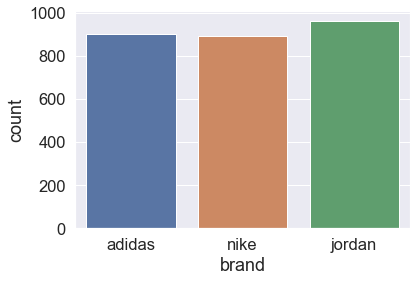

In [16]:
sns.countplot(sneakers_df.brand)

<AxesSubplot:xlabel='brand', ylabel='log_price_premium'>

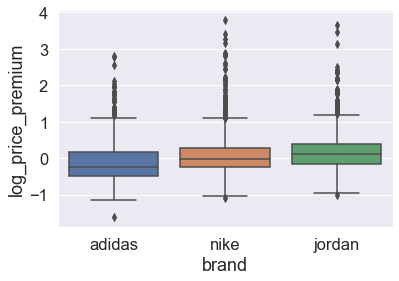

In [17]:
sns.boxplot(y=sneakers_df['log_price_premium'],x = sneakers_df.brand)

In [18]:
# Creating a column that has the count of the model that is present in the current df
sneakers_df['model_counts'] = sneakers_df.groupby(['model'])['log_price_premium'].transform('count')

In [19]:
sneakers_df.corr()['log_price_premium'].sort_values(ascending=False)

log_price_premium         1.000000
medianPremiumPrice(%)     0.759345
average_premium_price     0.752045
averagePremiumPrice(%)    0.752045
medianProfit              0.723724
medianTransaction         0.692236
averageTransaction        0.684235
most_profitable_week      0.255899
Collab                    0.214862
totalTransactions         0.184464
model_counts              0.161903
hasRed                    0.039995
releaseRank               0.039228
retailPrice($)            0.023253
hasBlue                  -0.001181
hasGreen                 -0.012491
hasWhite                 -0.017922
hasBlack                 -0.032501
hasGrey                  -0.047599
hasYellow                -0.052294
Name: log_price_premium, dtype: float64

In [20]:
#  dropping all the columns that i don't need
cols_2_drop = ['medianPremiumPrice(%)', 'averagePremiumPrice(%)', 'medianProfit', 'medianTransaction']
sneakers_df = sneakers_df.drop(cols_2_drop, axis=1)

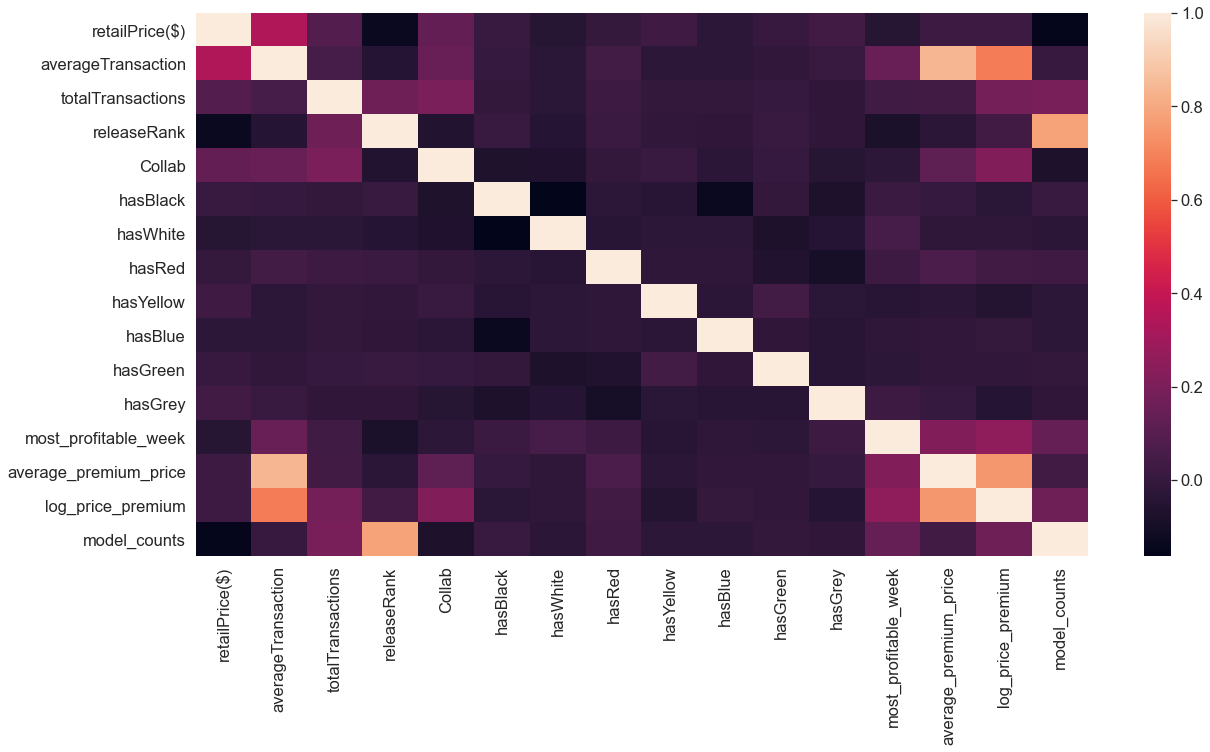

In [21]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax = sns.heatmap(sneakers_df.corr())

In [22]:
sneakers_df['line'] = sneakers_df['model'] .str.split().str.get(0).str.lower()

In [23]:
sneakers_df.loc[((sneakers_df['model'].str.contains('sb')) & (sneakers_df['brand'] == 'nike')),'line'] = 'sb'
sneakers_df.loc[((sneakers_df['model'].str.contains('yeezy')) & (sneakers_df['brand'] == 'adidas')),'line'] = 'yeezy'
sneakers_df.loc[((sneakers_df['model'].str.contains('nmd')) & (sneakers_df['brand'] == 'adidas')),'line'] = 'nmd'
sneakers_df.loc[((sneakers_df['model'].str.contains('ultra boost')) & (sneakers_df['brand'] == 'adidas')),'line'] = 'ultra boost'
sneakers_df.loc[((sneakers_df['model'].str.contains('y-3')) & (sneakers_df['brand'] == 'adidas')),'line'] = 'y3'

In [24]:
sneakers_df['line'].unique()

array(['yeezy', 'ultra boost', 'nmd', 'adidas', 'y3', 'sb', 'nike', 'air',
       'kyrie', 'kobe', 'lebron', 'kd', 'nikecraft', 'sf', 'flyknit',
       'lunar', 'pg', 'jordan'], dtype=object)

In [25]:
#Adding sb to nike line
sneakers_df.loc[((sneakers_df['model'].str.contains('sb')) & (sneakers_df['brand'] == 'nike')),'line'] = 'sb' 
#Adding yeezy to line column
sneakers_df.loc[((sneakers_df['model'].str.contains('yeezy')) & (sneakers_df['brand'] == 'adidas')),'line'] = 'yeezy'
#Adding nmd cat to line
sneakers_df.loc[((sneakers_df['model'].str.contains('nmd')) & (sneakers_df['brand'] == 'adidas')),'line'] = 'nmd'
#adding ultraboost cat to line
sneakers_df.loc[((sneakers_df['model'].str.contains('ultra boost')) & (sneakers_df['brand'] == 'adidas')),'line'] = 'ultra boost'

In [26]:
sneakers_df['line'].unique()

array(['yeezy', 'ultra boost', 'nmd', 'adidas', 'y3', 'sb', 'nike', 'air',
       'kyrie', 'kobe', 'lebron', 'kd', 'nikecraft', 'sf', 'flyknit',
       'lunar', 'pg', 'jordan'], dtype=object)

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


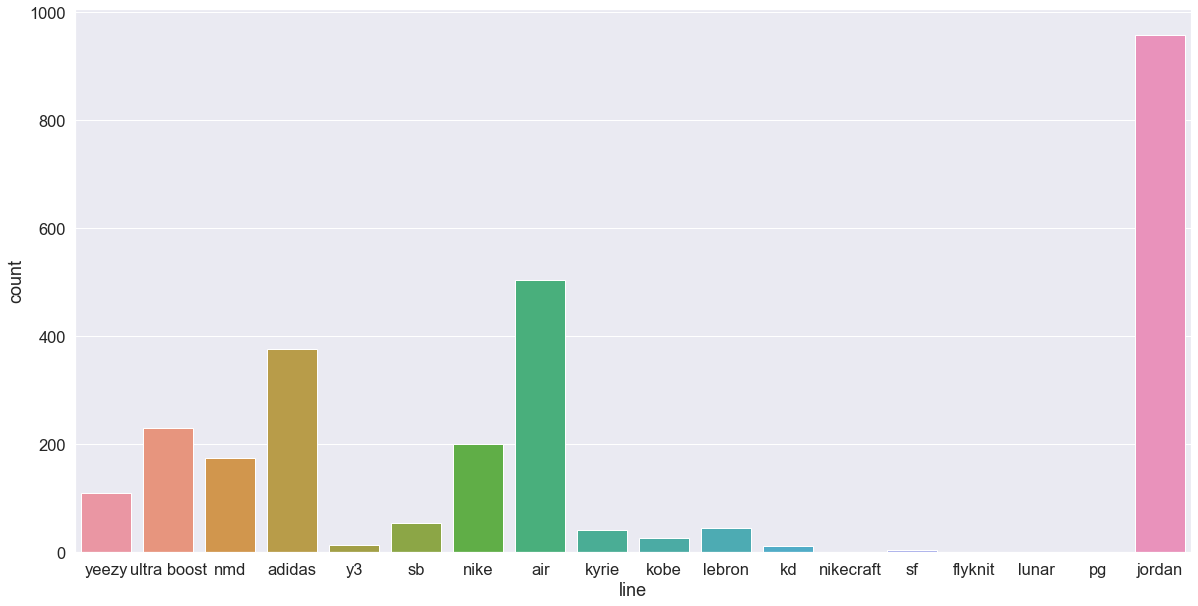

In [27]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax = sns.countplot(sneakers_df['line'])

In [28]:
sneakerline = sneakers_df.groupby(['line'])['average_premium_price'].mean()*100
sneakerline = sneakers_df.groupby(['line'])['average_premium_price'].describe()*100
#sneakerline = sneakerline['75%'].sort_values(ascending = False)
#sneakerline = sneakerline.sort_values(ascending = False)
#sneakerline = sneakerline[0:5]
#std = sneakers_df.groupby(['line'])['average_premium_price'].std().sort_values(ascending = False)
#print(std)

In [29]:
sneakerline.sort_values('std') # all lines that have a NaN std is because only one shoe exists for that line

,count,mean,std,min,25%,50%,75%,max
line,,,,,,,,
sf,400.0,-52.632500,4.639270,-57.57,-55.9500,-52.675,-49.3575,-47.61
kyrie,4200.0,20.273571,37.900470,-42.54,-4.1250,17.165,42.1250,130.58
adidas,37600.0,-15.750532,54.531672,-80.36,-43.2000,-28.335,-3.6900,598.23
ultra boost,23000.0,-8.862043,58.374399,-56.13,-38.1475,-27.185,-1.2350,461.13
y3,1400.0,-13.595714,84.629105,-65.01,-44.1625,-42.200,-36.1050,260.95
nike,20000.0,22.151250,87.839474,-66.22,-25.8650,-4.400,30.4650,506.63
lebron,4500.0,23.112667,97.485480,-38.50,-21.2700,-3.800,17.6100,433.51
kobe,2600.0,29.023462,108.841844,-34.64,-10.9050,5.610,24.9950,543.87
yeezy,10900.0,99.974679,145.372131,-16.70,18.9700,48.320,95.8600,736.59


In [30]:
#  Inspecting inidividual lines
line_name = 'lunar'
sneakers_df.loc[sneakers_df['line'] == line_name]

,color,model,name,brand,releaseDate,sku,retailPrice($),averageTransaction,totalTransactions,releaseRank,...,hasRed,hasYellow,hasBlue,hasGreen,hasGrey,most_profitable_week,average_premium_price,log_price_premium,model_counts,line
1746,White/White,lunar force 1 low,Lunar Force 1 Low Acronym (AF100),nike,2017-12-03,15f2b738-7bbe-4f2b-b730-341cf8581631,200.0,270.121101,1887,1.0,...,0,0,0,0,0,101.0,0.3506,0.300549,1,lunar


In [31]:
# modifying value for line for lunar as it is actually and air force 1 shoe
sneakers_df.at['1373', 'line'] = 'air'
sneakers_df.loc[sneakers_df['line'] == 'lunar', ['line']] = 'air'

In [32]:
categorical_features = ['line', 'brand']

In [33]:
for feature in categorical_features:
    dummies = pd.get_dummies(sneakers_df[feature], drop_first=False, prefix=feature)
    sneakers_df = sneakers_df.join(dummies)

In [34]:
# renaming all column headers so that they are snake_case
import re
sneakers_df = sneakers_df.rename(columns=lambda x: re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower())
sneakers_df = sneakers_df.rename(columns={'retail_price($)': 'retail_price'})

In [35]:
#Changing release_date to datetime
sneakers_df['release_date'] = sneakers_df['release_date']
sneakers_df.release_date = pd.to_datetime(sneakers_df.release_date)

(10957.0, 18262.0)

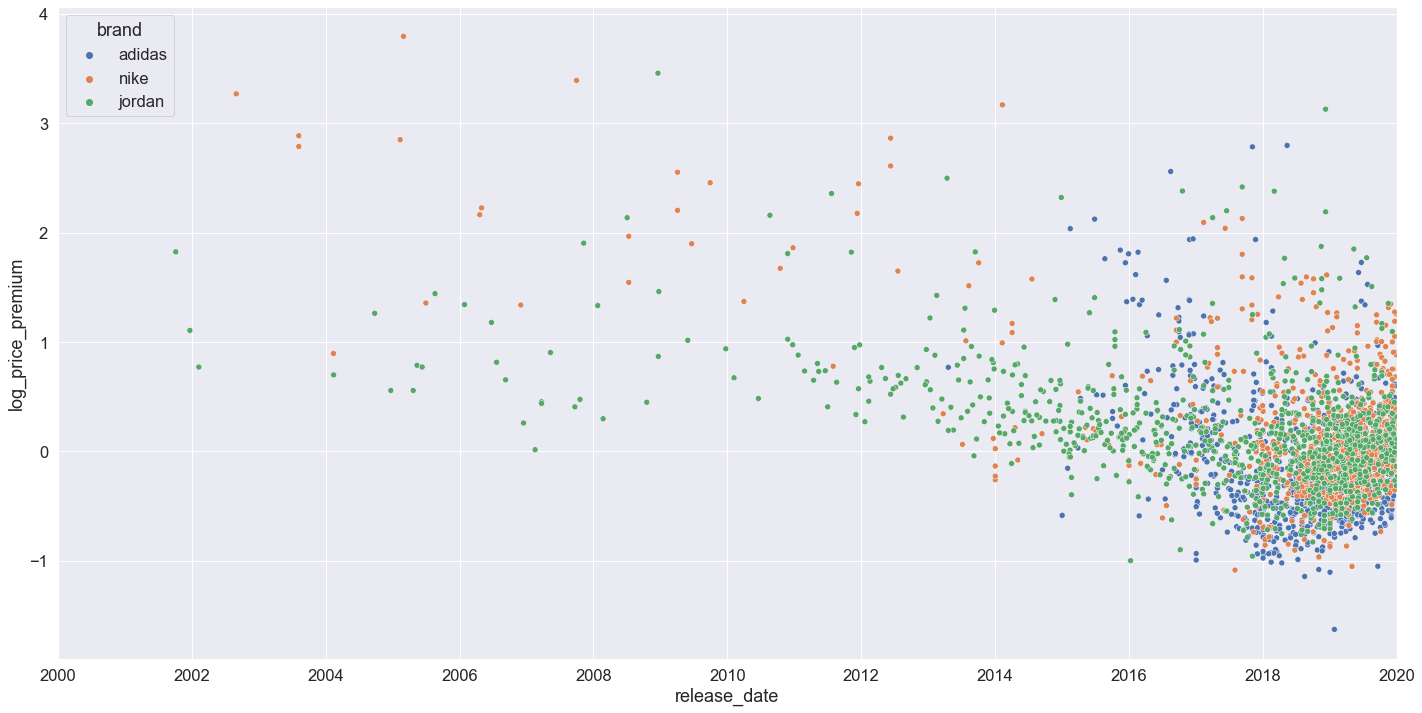

In [36]:
fig, ax1 = plt.subplots(figsize=(24, 12))
plt.grid()

sns.scatterplot(x='release_date',
                y='log_price_premium',
                hue='brand',
                data=sneakers_df,
                ax=ax1)

plt.grid()
plt.draw()
ax1.set_xlim([datetime.date(2000, 1, 1), datetime.date(2020, 1, 1)])

In [37]:
# dropping name and sku as they're unnecessary
cols_to_drop = ['name', 'sku', 'color', 'model', 'line', 'brand', 'release_date', 'average_premium_price'] 
final_df = sneakers_df.drop(columns=cols_to_drop)
# dropping all rows that have NaN
final_df = final_df.dropna(axis=0, how='any')

final_df.corr()['log_price_premium'].sort_values(ascending=False)

log_price_premium       1.000000
average_transaction     0.664915
most_profitable_week    0.255899
collab                  0.239708
total_transactions      0.224118
model_counts            0.196120
line_yeezy              0.189215
brand_jordan            0.148860
line_jordan             0.147174
line_sb                 0.105574
release_rank            0.079635
line_nikecraft          0.071852
brand_nike              0.055769
retail_price            0.042448
line_kd                 0.035618
has_red                 0.027557
line_air                0.024457
line_kyrie              0.023648
line_kobe               0.002005
line_flyknit            0.001904
line_nike              -0.000975
line_lebron            -0.003598
has_blue               -0.012191
line_pg                -0.014741
has_green              -0.016086
has_white              -0.018919
has_black              -0.033291
line_nmd               -0.037935
has_yellow             -0.048459
line_y3                -0.055530
line_sf   

In [38]:
# constucting y
y = final_df['log_price_premium']*100

# dropping log_price_premium as it's what I want to predict
cols_to_drop = ['log_price_premium', 'line_adidas', 'line_nike', 'line_jordan'] 
final_df = final_df.drop(columns=cols_to_drop)

In [39]:
X = final_df.copy()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2689 entries, 0 to 2754
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   retail_price          2689 non-null   float64
 1   average_transaction   2689 non-null   float64
 2   total_transactions    2689 non-null   float64
 3   release_rank          2689 non-null   float64
 4   collab                2689 non-null   float64
 5   has_black             2689 non-null   float64
 6   has_white             2689 non-null   float64
 7   has_red               2689 non-null   float64
 8   has_yellow            2689 non-null   float64
 9   has_blue              2689 non-null   float64
 10  has_green             2689 non-null   float64
 11  has_grey              2689 non-null   float64
 12  most_profitable_week  2689 non-null   float64
 13  model_counts          2689 non-null   float64
 14  line_air              2689 non-null   uint8  
 15  line_flyknit          2689

In [40]:
intlist = ['retail_price',
           'average_transaction',
           'total_transactions',
           'release_rank',
           'most_profitable_week',
           'model_counts']

#Scaling all the float features
for item in intlist:
    X[item] = (X[item] - np.mean(X[item]))/np.std(X[item])
    
X.head()

,retail_price,average_transaction,total_transactions,release_rank,collab,has_black,has_white,has_red,has_yellow,has_blue,...,line_nmd,line_pg,line_sb,line_sf,line_ultra boost,line_y3,line_yeezy,brand_adidas,brand_jordan,brand_nike
0,0.743809,0.210266,4.124183,1.946929,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
1,0.743809,0.593604,13.913593,-0.357472,1.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
2,0.743809,0.111715,1.307382,1.742093,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
3,0.743809,0.195019,6.264377,1.486049,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
4,0.743809,0.084959,3.715745,1.639676,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0


In [41]:
X.columns

Index(['retail_price', 'average_transaction', 'total_transactions',
       'release_rank', 'collab', 'has_black', 'has_white', 'has_red',
       'has_yellow', 'has_blue', 'has_green', 'has_grey',
       'most_profitable_week', 'model_counts', 'line_air', 'line_flyknit',
       'line_kd', 'line_kobe', 'line_kyrie', 'line_lebron', 'line_nikecraft',
       'line_nmd', 'line_pg', 'line_sb', 'line_sf', 'line_ultra boost',
       'line_y3', 'line_yeezy', 'brand_adidas', 'brand_jordan', 'brand_nike'],
      dtype='object')

In [42]:
# sm.add_consant adds a constant columns of 1.0 to the dataframe, this serves as the y intercept when generating the
# linear regression model
res2 = sm.OLS(y,sm.add_constant(X)).fit()

print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:      log_price_premium   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     147.5
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:48:26   Log-Likelihood:                -13211.
No. Observations:                2689   AIC:                         2.648e+04
Df Residuals:                    2658   BIC:                         2.667e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  5.37e+13 

**The summary can be used to evaluate the usefulness of different columns in predicting my target variable - log_price_premium. The way to it is to basically check for which features the P>|t| value is less than 0.05 - this is called hypothesis testing**

The coef column is contains the values for the gradient coefficients in a simple linear equation. For e.g. **The model is stating that as retail price increases by 1, log price premium increases by 2.48**

## Linear Regression

In [131]:
lr = LinearRegression()

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [133]:
#Applying std scalar and linear regression.

pipeline = Pipeline([(('lr',LinearRegression()))])
cv = KFold(n_splits=5,shuffle=True)
rmse_scores = cross_val_score(pipeline, X, y, cv = cv, scoring = 'neg_mean_squared_error')

In [134]:
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')
    
# get cross val scores
get_cv_scores(pipeline.fit(X_train,y_train))

CV Mean:  0.558516977985213
STD:  0.19709262477353934




In [135]:
rmse_scores

array([ -916.66567698, -1608.9703834 , -1022.91870895, -1017.28371484,
       -1465.95311496])

In [136]:
grid_search = GridSearchCV(lr, param_grid={}, cv = cv, verbose=1,scoring = 'neg_mean_squared_error')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LinearRegression(), param_grid={},
             scoring='neg_mean_squared_error', verbose=1)

#### Grid Search
A method for tuning the hyperparameters of a model. 

In [137]:
lr_predictions = grid_search.predict(X_test)

In [138]:
#The RMSE using LR

lr_score = np.sqrt(np.mean((lr_predictions - y_test)**2))
lr_score

35.63494749796458

In [83]:
lr_weights = grid_search.best_estimator_.coef_
lr_weights

array([-1.38832631e+01,  3.53408885e+01,  5.44433199e+00, -4.77852219e+00,
        2.45075181e+01, -6.43144110e-01,  2.54856346e+00, -3.49785218e+00,
       -5.53228576e+00,  2.68855141e+00, -4.22756377e-02, -3.36688837e+00,
        4.60578149e+00,  8.55465563e+00, -2.17256925e+00,  1.08688418e+01,
       -4.19524456e+00, -9.78621640e+00, -1.17368213e+01,  1.94908547e+00,
        5.76561946e+01,  1.94946600e+00, -3.93914206e+10,  3.10620495e+01,
       -5.96756809e+01,  7.52547293e+00,  1.04218728e+01,  2.23552358e+01,
        4.64363823e+13,  4.64363823e+13,  4.64363823e+13])

In [84]:
def compare_test_to_predictions(predictions, y_test):
    # Comparing test and predicted values
    pred_df = pd.DataFrame({'Predicted': lr_predictions.flatten()})
    return pd.merge(y_test, pred_df, left_index=True, right_index=True).rename(columns={'log_price_premium': 'Test'}).head()
                                
compare_test_to_predictions(lr_predictions, y_test)

,Test,Predicted
259,-45.649528,1.320312
423,-33.184297,-11.570312
443,7.816402,-4.773438
11,41.283786,-24.445312
50,42.729183,-17.656250


### Ridge

In [85]:
# find optimal alpha with grid search
params={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
rdg_reg = Ridge()
grid = GridSearchCV(estimator=rdg_reg, param_grid=params, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.5727102029553544
Best Params:  {'alpha': 4}


[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    3.4s finished


In [86]:
ridge = Ridge(alpha=100).fit(X_train, y_train)
get_cv_scores(ridge)

CV Mean:  0.5659898377892827
STD:  0.12144584130501648




r2 score increasing (model is better) and std decreasing (less likely to be overfitting)

In [87]:
ridgeweights = grid.best_estimator_.coef_

In [88]:
ridge_predictions = grid.predict(X_test)

In [89]:
#The RMSE using LR with Ridge Regularization
ridge_score = np.sqrt(np.mean((ridge_predictions - y_test)**2))
ridge_score

33.20720542853538

In [90]:
compare_test_to_predictions(ridge_predictions, y_test)

,Test,Predicted
259,-45.649528,1.320312
423,-33.184297,-11.570312
443,7.816402,-4.773438
11,41.283786,-24.445312
50,42.729183,-17.656250


### Lasso

In [91]:
params={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
lasso = Lasso()
clf2 = GridSearchCV(lasso,params,cv=cv,verbose = 1, scoring = 'neg_mean_squared_error')
clf2.fit(X_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [25, 10, 4, 2, 1.0, 0.8, 0.5, 0.3, 0.2, 0.1,
                                   0.05, 0.02, 0.01]},
             scoring='neg_mean_squared_error', verbose=1)

In [92]:
clf2.best_params_

{'alpha': 0.01}

In [93]:
lasso_weights = clf2.best_estimator_.coef_

In [94]:
lasso_predictions = clf2.predict(X_test)

In [95]:
#The RMSE using LR with Lasso Regularization
lasso_score = np.sqrt(np.mean((lasso_predictions - y_test)**2))
lasso_score

33.16450252058722

In [96]:
compare_test_to_predictions(lasso_predictions, y_test)

,Test,Predicted
259,-45.649528,1.320312
423,-33.184297,-11.570312
443,7.816402,-4.773438
11,41.283786,-24.445312
50,42.729183,-17.656250


Lasso regression uses L1 regularization to force some coefficients to be exactly zero. This means some features are completely ignored by the model. This can be thought of as a type of automatic feature selection! Increasing the alpha value in lasso regression means more features are ignored

In [97]:
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
# match column names to coefficients
for coef, col in enumerate(X_train.columns):
    print(f'{col}:  {lasso.coef_[coef]}')

retail_price:  -13.409041778770751
average_transaction:  35.442350327577635
total_transactions:  5.678579152293936
release_rank:  -4.124403692512589
collab:  21.24551233334983
has_black:  -0.368800830674655
has_white:  2.142667161946887
has_red:  -2.429132801958132
has_yellow:  -2.2461261304137716
has_blue:  1.5825695647003737
has_green:  -0.0
has_grey:  -2.4260042163346545
most_profitable_week:  4.79992657493695
model_counts:  8.166127882869572
line_air:  -0.017487197832169142
line_flyknit:  0.0
line_kd:  -0.0
line_kobe:  -0.0
line_kyrie:  -0.6298124015672171
line_lebron:  0.0
line_nikecraft:  0.0
line_nmd:  -0.0
line_pg:  0.0
line_sb:  28.274519426832008
line_sf:  -0.0
line_ultra boost:  3.632391395093559
line_y3:  0.0
line_yeezy:  19.5375201315567
brand_adidas:  -19.31342905677491
brand_jordan:  1.847022594991038
brand_nike:  -0.0


Looking above we can see which columns have been set to 0 by lasso regressiong(has_yelloq, line_flyknit etc.)

###  Elastic Net

In [98]:
# Elastic Net is a combination of lasso and ridge regression
from sklearn.linear_model import ElasticNet

params = {'alpha' : [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01], 
         "max_iter": [1, 5, 10,15,20,25],
          "l1_ratio": np.arange(0.0, 1.0, 0.1) }
enet = ElasticNet()
enetsearch = GridSearchCV(enet, param_grid=params, cv =cv, verbose=1, scoring = 'neg_mean_squared_error')

In [99]:
enetsearch.fit(X_train,y_train)

Fitting 5 folds for each of 780 candidates, totalling 3900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2236501.522521342, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2467884.317563303, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2519703.7902629566, tolerance

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2519686.0600079475, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2363152.9484424116, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2438310.8687892766, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Snea

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2424334.1323999823, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2283159.337774054, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2355130.843391456, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneake

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2749.3299758122303, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3325.3623347673565, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3873.6540284864604, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2237967.597730639, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2125043.4825458424, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2186223.961235589, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneake

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30769.749342670664, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292422.65994881466, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260918.0433094483, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2027133.797715491, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1942948.3087578118, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1984874.945463344, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneake

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1163197.7103520683, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1341546.2125551149, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1335900.6586181344, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1685348.959018055, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1808948.55991147, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1809791.3038907524, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_b

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1546590.5895049546, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1670915.5922056974, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1668036.7436967345, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1205262.6438523105, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1308587.951088741, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1298064.951628202, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1700525.2943002668, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1652998.8259788498, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1652412.296577748, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneak

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1411908.0760203819, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1525518.3591167158, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1518205.2814690452, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1215068.4878462711, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1317616.3617202102, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1307991.7047789257, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1541260.1349164825, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1507820.7646127867, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1482632.8841243433, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Snea

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1394628.380897284, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1502912.1413898936, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1494938.1182455523, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1286136.115026941, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1391503.5596163478, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1382536.882725584, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1169672.2675709676, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1271414.4577486778, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1264098.3713415547, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1403013.3918373478, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1391561.1830243142, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1369047.0658167503, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Snea

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1319091.5193587495, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1425780.3994044277, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1417110.6847778142, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1243900.3655954858, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1349617.2339146498, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1341173.9761677568, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1161883.8418156975, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1264992.3786814762, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1258697.3111084169, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1213397.0813458937, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1207503.1813335815, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1306887.943642806, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneake

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1286576.2272307882, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1393727.7026840295, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1384998.7999591182, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1250745.8658950864, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1357821.9690381552, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1349255.3141402474, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1213804.5371797546, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1320064.8544202228, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1311997.5263458756, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1174111.280720834, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1279118.2010444587, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1272200.9631414928, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1236758.1939954744, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1344547.9390620007, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1335905.5527773772, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95192.2172476449, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239201.78828684613, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1286.018541589845, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneak

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1196061.3482138822, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1303152.4875153743, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1295247.762968022, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1173981.2180279235, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1280218.4859366997, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1273024.7897112453, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1148281.243735593, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1253210.3462501825, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1247267.772147156, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56548.89767553657, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8190.573750871234, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7589.430032636272, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1105458.7326010591, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1091689.0234197015, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1084175.6882418832, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Snea

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178559.52359923662, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288352.7916917681, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162891.52582166018, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789.7660512011498, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1160051.2782600566, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1266267.7524834087, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneake

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 880989.9778858561, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 839688.129176383, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161825.07182051882, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11569.288215772249, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10555.655380645301, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9243.072021457367, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1226354.668495798, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1205640.2207976154, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1047150.1297604756, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneak

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31575.830398714636, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22928.866267436882, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25456.645258515375, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1025626.6674701528, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 931458.3661807693, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1140187.9119714494, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneake

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 812354.609066833, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 901447.3738826031, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 874086.7657190452, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_ba

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334226.53585047566, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301825.17960504093, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172899.07382043602, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneak

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 980000.5456977035, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 962731.8841335967, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 953885.6489407641, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 366289.73137226317, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 319241.4559973902, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260252.1319379448, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1109209.9449814367, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1210818.4323590114, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1206179.2475872096, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295391.944706331, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153729.5911897621, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308105.51199523907, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 906030.3592341575, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 910005.548703618, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1019847.8726597176, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1007523.4109910628, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 993165.7104946307, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 986883.9928035743, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneake

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 768117.9995094073, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 728688.0837396944, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 799344.7841521478, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1110684.6457490209, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1212623.0490456477, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1207695.9496086505, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 649946.6051655727, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 714104.1874710739, tolerance: 506.69256900115647
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 686333.7561711427, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_b

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 349885.4238533282, tolerance: 518.481346811691
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384301.65333176195, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332389.3082303235, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneake

/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1170870.993528236, tolerance: 484.75831544774644
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1013874.7178849035, tolerance: 500.06325303335007
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 850635.3642372484, tolerance: 457.43776116323
  positive)
/Users/janzajac/.local/share/virtualenvs/Sneaker

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [25, 10, 4, 2, 1.0, 0.8, 0.5, 0.3, 0.2, 0.1,
                                   0.05, 0.02, 0.01],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [1, 5, 10, 15, 20, 25]},
             scoring='neg_mean_squared_error', verbose=1)

In [100]:
print('Best Score: ', enetsearch.best_score_)
print('Best Params: ', enetsearch.best_params_)


Best Score:  -1210.0823386264105
Best Params:  {'alpha': 0.01, 'l1_ratio': 0.2, 'max_iter': 10}


In [101]:
enet_prediction = enetsearch.predict(X_test)

In [102]:
##The RMSE using LR with ElasticNet Regularization
enet_score = np.sqrt(np.mean((y_test - enet_prediction)**2))

In [103]:
print(f"The total range of the log_price_premium is {max(y) - min(y)}")

The total range of the log_price_premium is 479.6467800175692


In [104]:
import xgboost

In [105]:
#for tuning parameters
parameters_for_testing = {
   'colsample_bytree':[0.8],
    'gamma': [0],
    'min_child_weight':[1.5],
    'learning_rate':[0.07],
    'max_depth':[3],
    'n_estimators':[10000],
    'reg_alpha':[1e-2],
    'reg_lambda':[1e-2],
    'subsample':[0.6] }

xgb_model = xgboost.XGBRegressor()
gsearch1 = GridSearchCV(estimator=xgb_model,
                        cv=cv, 
                        param_grid=parameters_for_testing,
                        n_jobs=-1,
                        iid=False,
                        verbose=10,
                        scoring='neg_mean_squared_error')
gsearch1.fit(X_train,y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   35.3s remaining:   52.9s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   35.4s remaining:   23.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.9s finished
/Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, mon...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             iid=False, n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0],
                   

In [106]:
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

best params
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.07, 'max_depth': 3, 'min_child_weight': 1.5, 'n_estimators': 10000, 'reg_alpha': 0.01, 'reg_lambda': 0.01, 'subsample': 0.6}
best score
-12.136783152049777


In [107]:
gprediction = gsearch1.predict(X_test)

In [114]:
##The RMSE using XG BOOST
xg_boost_score = np.sqrt(np.mean((y_test - gprediction)**2))
xg_boost_score

4.615261317708048

In [115]:
compare_test_to_predictions(gprediction, y_test)

,Test,Predicted
259,-45.649528,1.320312
423,-33.184297,-11.570312
443,7.816402,-4.773438
11,41.283786,-24.445312
50,42.729183,-17.656250


In [116]:
from xgboost import plot_importance

In [117]:
gsearch1.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.01, reg_lambda=0.01, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature Importance'}, xlabel='F-Score', ylabel='Features'>

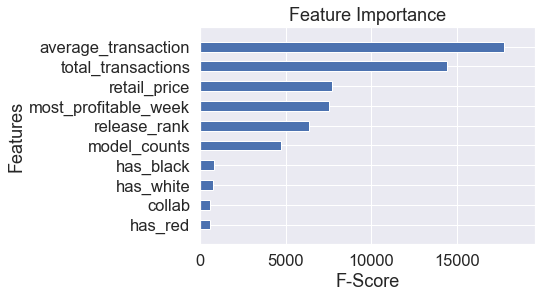

In [118]:
plot_importance(gsearch1.best_estimator_,
                max_num_features=10,
                show_values=False,
                ax=None,
                height=0.5,
                xlim=None,
                ylim=None,
                title='Feature Importance',
                xlabel='F-Score',
                ylabel='Features',
                importance_type='weight',
                grid=True)

In [119]:
#  Checking if XGboost is overfitting
training_prediction = gsearch1.predict(X_train)
##The RMSE using XG BOOST
print(np.sqrt(np.mean((y_train - training_prediction)**2)))
print(np.sqrt(np.mean((y_test - gprediction)**2)))

0.05962520127699241
4.615261317708048


In [140]:
rmse_dict = [
    {"RMSE": [lr_score, lasso_score, ridge_score, enet_score, xg_boost_score]},
    {"Model": ["Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net Regression", "XG Boost"]}]


rmse_dict = [{"RMSE": score,} for score in [lr_score, lasso_score, ridge_score, enet_score, xg_boost_score]]
model_dict = [{"Model": model} for model in ["Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net Regression", "XG Boost"]]
for i, j in zip(rmse_dict, model_dict):
    j['RMSE'] = i['RMSE']

pd.DataFrame(model_dict)

,Model,RMSE
0,Linear Regression,35.634947
1,Lasso Regression,33.164503
2,Ridge Regression,33.207205
3,Elastic Net Regression,33.319996
4,XG Boost,4.615261


**Looking above, XGboost is overfitting by alot**

In [119]:
from keras import models
from keras import layers
import numpy as np
from keras import optimizers
from keras.wrappers.scikit_learn import KerasRegressor


In [121]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error'):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [123]:
# # having 34 neuron is based on the number of available features
# def create_model(optimizer):
#     num_features = len(X_train.columns)
#     model = models.Sequential()
#     model.add(layers.Dense(34, input_dim=X_train.shape[1], activation='relu'))
#     model.add(layers.Dense(34, activation='relu'))
#     model.add(layers.Dense(34, activation='relu'))
#     model.add(layers.Dense(34, activation='relu'))
#     model.add(layers.Dense(1))
    
#     model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
    
#     return model

# model = KerasRegressor(build_fn=create_model, verbose=0)
# param_grid = {
#     'optimizer': ['SGD', 'RMSprop', 'Adagrad'],
#     'epochs': [10, 25, 50, 100, 300],
#     'batch_size':[4, 8, 32, 164, 128]
# }

# # maybe this will help
# #X_train = X_train.reset_index()


# # model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
# #                                         param_grid, cv=10, scoring_fit='neg_log_loss')


# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
# grid_result = grid.fit(X_train, y_train)


In [124]:
# #summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: -357.077039 using {'batch_size': 8, 'epochs': 300, 'optimizer': 'RMSprop'}
nan (nan) with: {'batch_size': 4, 'epochs': 10, 'optimizer': 'SGD'}
-3052.078467 (480.487598) with: {'batch_size': 4, 'epochs': 10, 'optimizer': 'RMSprop'}
-2965.281592 (271.120511) with: {'batch_size': 4, 'epochs': 10, 'optimizer': 'Adagrad'}
nan (nan) with: {'batch_size': 4, 'epochs': 25, 'optimizer': 'SGD'}
-1592.882129 (239.048616) with: {'batch_size': 4, 'epochs': 25, 'optimizer': 'RMSprop'}
-3002.589941 (312.347467) with: {'batch_size': 4, 'epochs': 25, 'optimizer': 'Adagrad'}
nan (nan) with: {'batch_size': 4, 'epochs': 50, 'optimizer': 'SGD'}
-1047.092639 (147.093535) with: {'batch_size': 4, 'epochs': 50, 'optimizer': 'RMSprop'}
-2960.757764 (306.136727) with: {'batch_size': 4, 'epochs': 50, 'optimizer': 'Adagrad'}
nan (nan) with: {'batch_size': 4, 'epochs': 100, 'optimizer': 'SGD'}
-574.594556 (108.493883) with: {'batch_size': 4, 'epochs': 100, 'optimizer': 'RMSprop'}
-2940.320410 (268.362389) with

In [126]:
# nn_prediction = grid_result.predict(X_test)

ValueError: in user code:

    /Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /Users/janzajac/.local/share/virtualenvs/Sneakers_backup-jpjtf4ZT/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_379 is incompatible with the layer: expected axis -1 of input shape to have value 36 but received input with shape [None, 34]
